# DynaSent version 1: Round 1 analysis

In [1]:
__author__ = 'Christopher Potts'

## Contents

1. [Set-up](#Set-up)
1. [Load the splits](#Load-the-splits)
1. [Label distributions](#Label-distributions)
1. [Relationship between validation labels and model predictions](#Relationship-between-validation-labels-and-model-predictions)
1. [Adversarial rates](#Adversarial-rates)
1. [Relationship between validation labels and review-level ratings](#Relationship-between-validation-labels-and-review-level-ratings)
1. [Distribution of validation response distributions](#Distribution-of-validation-response-distributions)
1. [Worker distribution](#Worker-distribution)
1. [Estimates of human performance](#Estimates-of-human-performance)
1. [Examples for the paper](#Examples-for-the-paper)
1. [Random cases](#Random-cases)

## Set-up

In [2]:
import matplotlib.pyplot as plt
import os

import dynasent_utils as utils

In [3]:
plt.style.use("dynasent.mplstyle")

In [4]:
src_dirname = "dynasent-v1"

In [5]:
filename_template = os.path.join(
    src_dirname, "dynasent-v1-round01-yelp-{}.jsonl")

In [6]:
train_filename = filename_template.format("train")

In [7]:
dev_filename = filename_template.format("dev")

In [8]:
test_filename = filename_template.format("test")

## Load the splits

In [9]:
train = utils.load_dataset(train_filename)

In [10]:
train[0]

{'hit_ids': ['y5238'],
 'sentence': 'Roto-Rooter is always good when you need someone right away.',
 'indices_into_review_text': [0, 60],
 'model_0_label': 'positive',
 'model_0_probs': {'negative': 0.01173639390617609,
  'positive': 0.7473671436309814,
  'neutral': 0.24089649319648743},
 'text_id': 'IDHkeGo-nxhqX4Exkdr08A',
 'review_rating': 1,
 'label_distribution': {'positive': ['w130', 'w186', 'w207', 'w264', 'w54'],
  'negative': [],
  'neutral': [],
  'mixed': []},
 'gold_label': 'positive'}

In [11]:
train_ternary = utils.load_dataset(
    train_filename,
    labels=('positive', 'negative', 'neutral'))

In [12]:
dev = utils.load_dataset(dev_filename)

In [13]:
test = utils.load_dataset(test_filename)

## Label distributions

In [14]:
utils.get_label_distribution(train, dev, test, dist_labels=False)

neutral         47476
positive        23791
negative        16421
No Majority     10071
mixed            3900
Total          101659
Name: gold_label, dtype: int64

In [15]:
utils.get_label_distribution(train, dist_labels=True)

neutral     215935
positive    130045
negative     86486
mixed        39829
Total       472295
dtype: int64

In [16]:
train_cat = utils.get_label_distribution(train, dist_labels=False)

In [17]:
train_cat

neutral        45076
positive       21391
negative       14021
No Majority    10071
mixed           3900
Total          94459
Name: gold_label, dtype: int64

In [18]:
# Ternary only:

train_cat.loc[['positive', 'negative', 'neutral']].sum()

80488

In [19]:
utils.get_label_distribution(dev, dist_labels=False)

negative    1200
positive    1200
neutral     1200
Total       3600
Name: gold_label, dtype: int64

In [20]:
utils.get_label_distribution(test, dist_labels=False)

negative    1200
positive    1200
neutral     1200
Total       3600
Name: gold_label, dtype: int64

## Relationship between validation labels and model predictions

In [21]:
utils.get_label_model_relationship(train)

gold_label  model_0_label
mixed       negative           955
            neutral           2099
            positive           846
negative    negative          8677
            neutral           3389
            positive          1955
neutral     negative         11793
            neutral          20458
            positive         12825
positive    negative          3482
            neutral           4375
            positive         13534
dtype: int64

In [22]:
utils.get_label_model_relationship(dev)

gold_label  model_0_label
negative    negative         400
            neutral          400
            positive         400
neutral     negative         400
            neutral          400
            positive         400
positive    negative         400
            neutral          400
            positive         400
dtype: int64

In [23]:
utils.get_label_model_relationship(test)

gold_label  model_0_label
negative    negative         400
            neutral          400
            positive         400
neutral     negative         400
            neutral          400
            positive         400
positive    negative         400
            neutral          400
            positive         400
dtype: int64

## Adversarial rates

In [24]:
adversarial, total = utils.get_adversarial_rate(
    train, dev, test,
    model_colname='model_0_label',
    labels=('positive', 'negative', 'neutral'))

print(f"{adversarial:,} of {total:,} examples ({adversarial/total:0.2%}) are adversarial")

42,619 of 91,588 examples (46.53%) are adversarial


## Relationship between validation labels and review-level ratings

In [25]:
utils.get_label_rating_relationship(train)

gold_label  review_rating
mixed       1                 1251
            5                 2649
negative    1                 3328
            5                10693
neutral     1                17960
            5                27116
positive    1                10968
            5                10423
dtype: int64

In [26]:
utils.get_label_rating_relationship(dev)

gold_label  review_rating
negative    1                600
            5                600
neutral     1                600
            5                600
positive    1                600
            5                600
dtype: int64

In [27]:
utils.get_label_rating_relationship(test)

gold_label  review_rating
negative    1                600
            5                600
neutral     1                600
            5                600
positive    1                600
            5                600
dtype: int64

## Distribution of validation response distributions

In [28]:
utils.get_dist_of_majority_dists(train)

3    36795
4    30112
5    17481
dtype: int64

In [29]:
utils.get_dist_of_majority_dists(dev)

4    2356
5    1244
dtype: int64

In [30]:
utils.get_dist_of_majority_dists(test)

4    2365
5    1235
dtype: int64

## Worker distribution

In [31]:
worker_dist = utils.get_global_worker_dist(train, dev, test)

worker_dist.shape

(1833,)

In [32]:
worker_dist.head()

w135    7528
w54     7083
w114    6203
w22     5896
w4      5119
dtype: int64

In [33]:
worker_dist.median()

45.0

In [34]:
worker_dist.mode()

0    11
dtype: int64

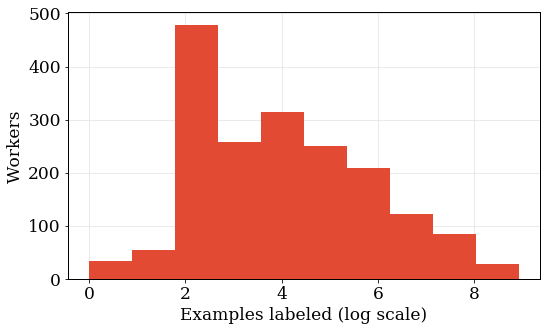

In [35]:
utils.plot_global_worker_dist(
    worker_dist, os.path.join('img', 'round1-workers.png'))

## Estimates of human performance

In [36]:
utils.get_fleiss_kappa(dev).round(3)

0.616

In [37]:
utils.get_fleiss_kappa(test).round(3)

0.615

In [38]:
utils.estimate_human_precision_recall_f1(dev).round(3)

,precision,recall,F1,support
positive,0.884,0.879,0.881,1200.0
negative,0.931,0.857,0.892,1200.0
neutral,0.860,0.872,0.866,1200.0
Macro avg,0.892,0.869,0.880,1200.0


In [39]:
utils.estimate_human_precision_recall_f1(test).round(3)

,precision,recall,F1,support
positive,0.886,0.871,0.878,1200.0
negative,0.932,0.857,0.893,1200.0
neutral,0.861,0.878,0.869,1200.0
Macro avg,0.893,0.869,0.880,1200.0


In [40]:
agr_df = utils.get_worker_agreement(dev)

In [41]:
agr_df[agr_df.rate == 1.0].shape[0]

614

In [42]:
agr_df.shape[0]

1280

In [43]:
## Percentage of workers with 95% agreement or more:

agr_df[agr_df.rate >= 0.95].shape[0] / agr_df.shape[0]

0.5109375

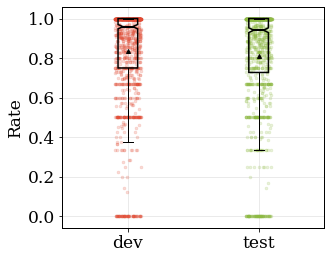

In [44]:
utils.plot_worker_agreement(
    dev, test, os.path.join('img', 'human-agr-round1.png'))

## Examples for the paper

In [45]:
utils.sample_short_examples(train, 'model_0_label')

,sentence,model_0_label,responses
0,Good food nasty attitude by hostesses .,negative,"mix, mix, mix, neg, neg"
3,Not much of a cocktail menu that I saw.,negative,"neg, neg, neg, neg, neg"
6,I scheduled the work for 3 weeks later.,negative,"neu, neu, neu, neu, pos"
9,"I was very mistaken, it was much more!",negative,"neg, pos, pos, pos, pos"
1,"It is a gimmick, but when in Rome, I get it.",neutral,"mix, mix, mix, neu, neu"
4,Probably a little pricey for lunch.,neutral,"mix, neg, neg, neg, neg"
7,But this is strictly just my opinion.,neutral,"neu, neu, neu, neu, pos"
10,"The price was okay, not too pricey.",neutral,"mix, neu, pos, pos, pos"
2,The only downside was service was a little slow.,positive,"mix, mix, mix, neg, neg"
5,However there is a 2 hr seating time limit.,positive,"mix, neg, neg, neg, neu"


## Random cases

In [46]:
utils.sample_examples(train, 'model_0_label')

,sentence,model_0_label,responses
0,We so wanted to have a new steak house restaurant.,positive,"neu, neu, neu, neu, pos"
1,"As a foodie, I can surely taste the difference.",positive,"neu, neu, neu, pos, pos"
2,There was however some nice dinner table chairs that I liked a lot for $35 a piece and for the quality and style this was a very nice price for them.,positive,"pos, pos, pos, pos, pos"
3,The waitress helped me pick from the traditional menu and I ended up with chilli chicken.,positive,"neu, neu, pos, pos, pos"
4,I have had lashes in the past and have used some of those Living Social deals.,positive,"neu, neu, neu, neu, pos"
5,Lots of trash cans.,neutral,"mix, neu, neu, neu, neu"
6,They were out the next day after my call to do the inspection and same for the treatment.,positive,"mix, neu, neu, neu, pos"
7,"When we walked in no one was there to sit us, I waited for a minute and then decided just to take a seat.",negative,"mix, neg, neg, neg, neg"
8,Driver was amazing!,positive,"pos, pos, pos, pos, pos"
9,We tried:\n\nChampagne On Deck - Smooth and easy to drink.,positive,"neu, neu, pos, pos, pos"
